# Neural Network  (22AI511T)

## Name: Tanmay Rathod
## Enrollment: 23MAI007



# Unit Step Function

Predicted Output:
Input: [1 0], Actual: 1, Predicted Output: 1
Input: [0 1], Actual: 1, Predicted Output: 1
Input: [0 0], Actual: 0, Predicted Output: 0
Input: [1 1], Actual: 0, Predicted Output: 0


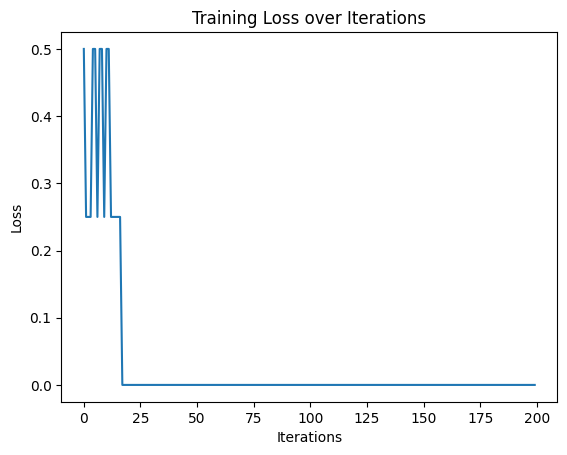

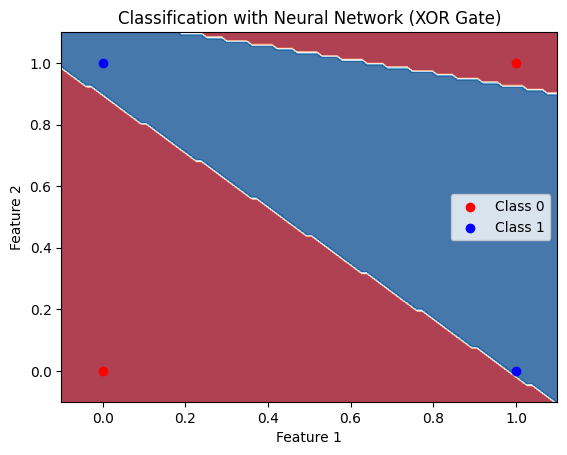

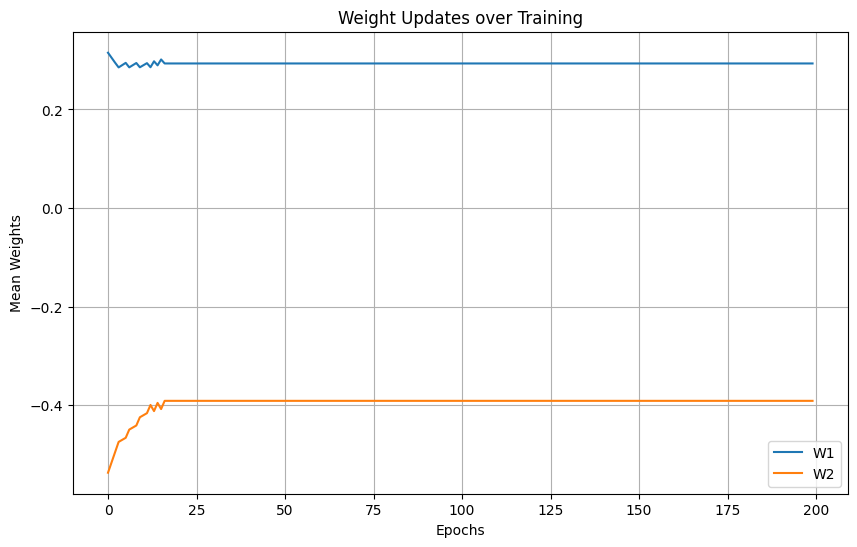

In [153]:
import numpy as np 
import matplotlib.pyplot as plt 

def unit_step(x):
    return np.where(x > 0, 1, 0)

def forward(x, w1, w2, predict=False):
    a1 = np.dot(x, w1)
    z1 = unit_step(a1)
    bias = np.ones((len(x), 1))
    z1 = np.concatenate((bias, z1), axis=1)
    a2 = np.dot(z1, w2)
    z2 = unit_step(a2)
    if predict:
        return z2
    return a1, z1, a2, z2

def backprop(a2, X, z1, z2, y, w2, a1):
    delta2 = z2 - y
    Delta2 = np.dot(z1.T, delta2)
    delta1 = (delta2.dot(w2[1:, :].T)) * 1  
    Delta1 = np.dot(X.T, delta1)
    return delta2, delta1, Delta1, Delta2

X = np.array([[1, 1, 0],
              [1, 0, 1],
              [1, 0, 0],
              [1, 1, 1]])

Y = np.array([1, 1, 0, 0]).reshape(-1, 1)

w1 = np.random.randn(3, 5)
w2 = np.random.randn(6, 1)
w1_hist = []
w2_hist = []
lr = 0.1
costs = []
epochs = 200
m = len(X)

for i in range(epochs):
    a1, z1, a2, z2 = forward(X, w1, w2)
    delta2, delta1, Delta1, Delta2 = backprop(a2, X, z1, z2, Y, w2, a1)
    w1 = w1 - lr * (1/m) * Delta1
    w2 = w2 - lr * (1/m) * Delta2
    w1_hist.append(np.mean(w1))
    w2_hist.append(np.mean(w2))
    c = np.mean(np.abs(delta2))
    costs.append(c)

predictions = forward(X, w1, w2, predict=True)
print("Predicted Output:")
for i in range(len(X)):
    print(f"Input: {X[i, 1:]}, Actual: {Y[i][0]}, Predicted Output: {predictions[i][0]}")

plt.plot(costs)
plt.title("Training Loss over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

x_min, x_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
y_min, y_max = X[:, 2].min() - 0.1, X[:, 2].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

grid_data = np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()]

Z = forward(grid_data, w1, w2, predict=True)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[Y.ravel() == 0, 1], X[Y.ravel() == 0, 2], color='red', label='Class 0')
plt.scatter(X[Y.ravel() == 1, 1], X[Y.ravel() == 1, 2], color='blue', label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification with Neural Network (XOR Gate)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(w1_hist, label='W1')
plt.plot(w2_hist, label='W2')
plt.title('Weight Updates over Training')
plt.xlabel('Epochs')
plt.ylabel('Mean Weights')
plt.legend()
plt.grid(True)
plt.show()


In [160]:
print("w1 is", w1[-1])
print("w2 is", w2[:,0])
print("bias is", w1[0])
print("error loss is", costs[-1])


w1 is [-1.38615824  0.30280919  0.45994265  0.53626582  0.30153141]
w2 is [ 0.00763391 -0.78017054 -1.94433573  0.56364245  0.0914174  -0.28527304]
bias is [ 1.23841439 -0.34564419  0.49192637  1.57695413 -0.45767063]
error loss is 0.0
